In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [104]:
#----------------------SKLEARN--------------------------#
from sklearn.datasets import load_iris
from sklearn.datasets import load_breast_cancer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn import tree
#--------------------------------------------------------#

In [105]:
CSV_FILE_NAME = 'processed.csv'
TARGET = 'BP'

In [106]:
df = pd.read_csv(CSV_FILE_NAME, low_memory=False)

In [107]:
numerical_columns_with_nans = []
for column in df.columns:
    if df.dtypes[column] == 'object':
        continue
    total_nans = df[column].isna().sum()
    if total_nans > 0:
        numerical_columns_with_nans.append(column)
        #print(f"{column} - {total_nans} NANS")
        
df = df.dropna(subset=numerical_columns_with_nans)

In [108]:
features =   ['Crossing', 'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys']

In [109]:
X_train, X_test, Y_train, Y_test = train_test_split(
    df[features], 
    df[TARGET],
    random_state=0
)

In [110]:
# Step 1: Import the model you want to use
# This was already imported earlier in the notebook so commenting out
#from sklearn.tree import DecisionTreeClassifier

# Step 2: Make an instance of the Model
clf = DecisionTreeClassifier(max_depth = 3, random_state = 0)

# Step 3: Train the model on the data
clf.fit(X_train, Y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

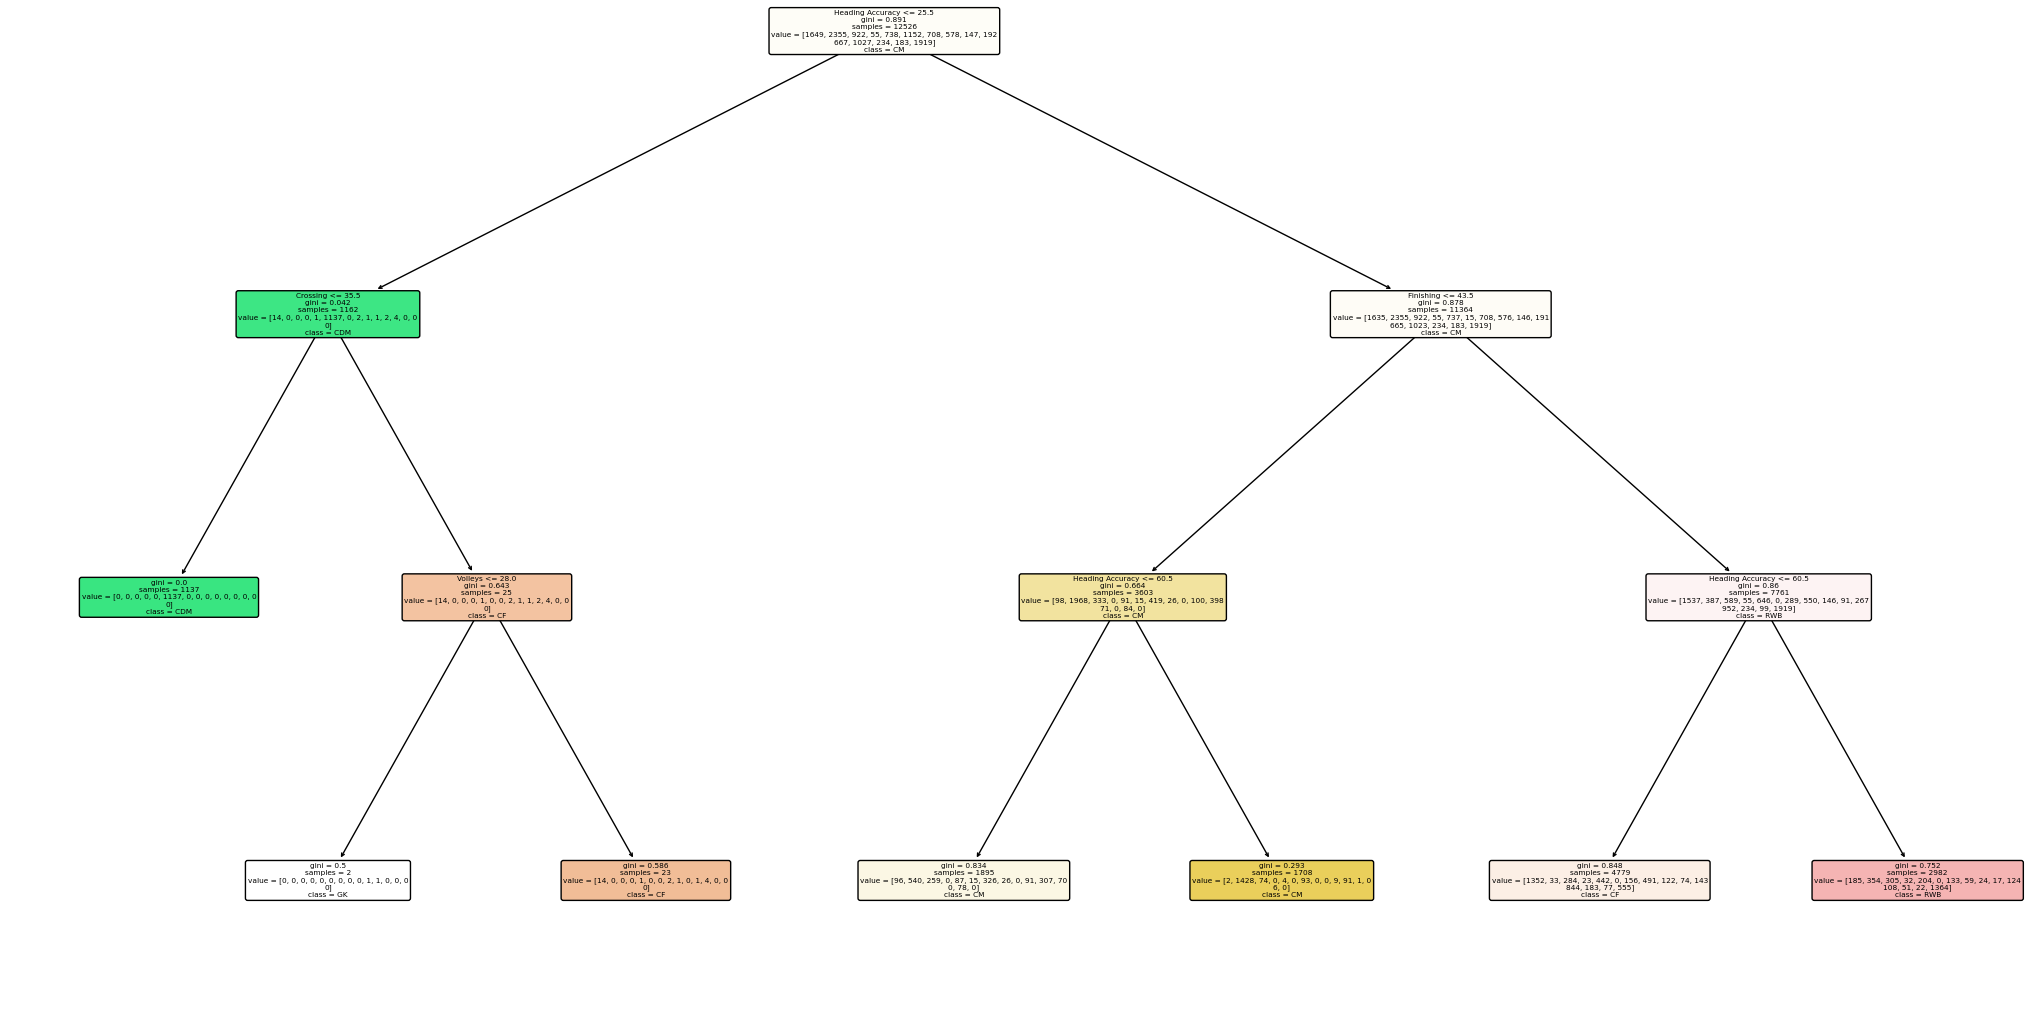

In [111]:
import tkinter as tk

root = tk.Tk()
width = root.winfo_screenwidth()
height = root.winfo_screenheight()
mydpi = 100

fig, axes = plt.subplots(figsize=(width/mydpi, height/mydpi), dpi=mydpi)

class_names = list(set(df[TARGET]))

tree.plot_tree(
    clf,
    feature_names=features, 
    class_names=class_names,
    filled=True,
    rounded=True
);

fig.savefig('dt.png', dpi=500, bbox_inches = 'tight')

# Prediction

In [112]:
result = clf.predict(X_test)

In [113]:
total_corrects = (result == Y_test).sum()
total_elements = len(Y_test)

print(f"Accuracy: {total_corrects / total_elements}")

Accuracy: 0.46575670498084293
